In [ ]:
pip install opencv-contrib-python

     |████████████████████████████████| 55.7 MB 62.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
#import os module for reading training data directories and paths
import os
#import numpy to convert python lists to numpy arrays as
#it is needed by OpenCV face recognizers
import numpy as np
import sys
#matplotlib for display our images
import matplotlib.pyplot as plt
%matplotlib inline

print(os.listdir("../input/haarcascades"))
print(os.listdir("../input/trainingdata/training-data"))


['haarcascade_righteye_2splits.xml', 'haarcascade_smile.xml', 'haarcascade_lowerbody.xml', 'haarcascade_frontalface_alt_tree.xml', 'haarcascade_fullbody.xml', 'haarcascade_upperbody.xml', 'haarcascade_lefteye_2splits.xml', 'haarcascade_frontalface_alt2.xml', 'haarcascade_eye_tree_eyeglasses.xml', 'haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_default.xml', 'haarcascade_eye.xml', 'haarcascade_russian_plate_number.xml', 'haarcascade_licence_plate_rus_16stages.xml', 'haarcascade_profileface.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_frontalcatface_extended.xml']
['s2', 's1']


In [ ]:
subjects = ["", "MS Dhoni", "Shahrukh Khan"]

In [ ]:
def detect_face(img):
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow Haar classifier
    face_cascade = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')

    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);

    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None

    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]

    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]


In [ ]:
def prepare_training_data(data_folder_path):

    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []

    #let's go through each directory and read images within it
    for dir_name in dirs:

        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("s"):
            continue;

        #------STEP-2--------
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("s", ""))

        #build path of directory containin images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name

        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)

        #------STEP-3--------
        #go through each image name, read image,
        #detect face and add face to list of faces
        for image_name in subject_images_names:

            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;

            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            #display an image window to show the image
            #cv2.imshow("window", image)
            cv2.waitKey(100)

            #detect face
            face, rect = detect_face(image)

            #------STEP-4--------
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()

    return faces, labels

Preparing data...
Data prepared
Total faces:  11
Total labels:  11


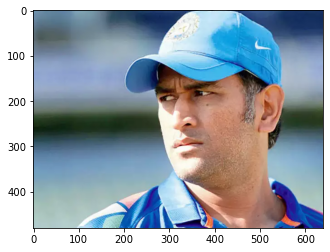

In [ ]:
print("Preparing data...")
faces, labels = prepare_training_data("../input/trainingdata/training-data")
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))


In [ ]:
cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier(cascPath)
#help(cv2.VideoCapture)

In [ ]:
face_recognizer=cv2.face.LBPHFaceRecognizer_create()
#help(cv2.face)

In [ ]:
face_recognizer.train(faces, np.array(labels))

In [ ]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

#function to draw text on give image starting from
#passed (x, y) coordinates.
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [ ]:
#this function recognizes the person in image passed
#and draws a rectangle around detected face with name of the
#subject
def predict(test_img):
    #make a copy of the image as we don't want to chang original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer

    label= face_recognizer.predict(face)
    if(label[1]!=0):
        label_text="unknown"
    else:
        label=label[0]

    #get name of respective label returned by face recognizer
        label_text = subjects[label]
    print(label_text)
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)

    return img


In [ ]:
print("Predicting images...")

#load test images
test_img1 = cv2.imread("../input/dhonim/dhoni.jpg")
test_img2 = cv2.imread("../input/trainingdata/training-data/s1/5.jpg")

test_img3 = cv2.imread("../input/trainingdata/training-data/s2/4.jpg")
#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
predicted_img3 = predict(test_img3)
print("Prediction complete")

#create a figure of 2 plots (one for each test image)
f, (ax1,ax2,ax3) = plt.subplots(1, 3,  figsize=(10, 5))

#display test image1 result
ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))

#display test image2 result
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(predicted_img3,cv2.COLOR_BGR2RGB))


Predicting images...
MS Dhoni
MS Dhoni


error: OpenCV(4.4.0) /tmp/pip-req-build-yln3mf6z/opencv/modules/core/src/matrix.cpp:235: error: (-215:Assertion failed) s >= 0 in function 'setSize'
